In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('SPY.csv')

# Display the first few rows of the DataFrame
df.head()

,Date,Open,High,Low,Close,Volume,Day,Weekday,Week,Month,Year
0,1993-01-29,24.626128,24.626128,24.503610,24.608625,1003200,29,4,4,1,1993
1,1993-02-01,24.626132,24.783655,24.626132,24.783655,480500,1,0,5,2,1993
2,1993-02-02,24.766129,24.853642,24.713622,24.836140,201300,2,1,5,2,1993
3,1993-02-03,24.871147,25.116183,24.853645,25.098680,529400,3,2,5,2,1993
4,1993-02-04,25.186204,25.256214,24.906163,25.203707,531500,4,3,5,2,1993


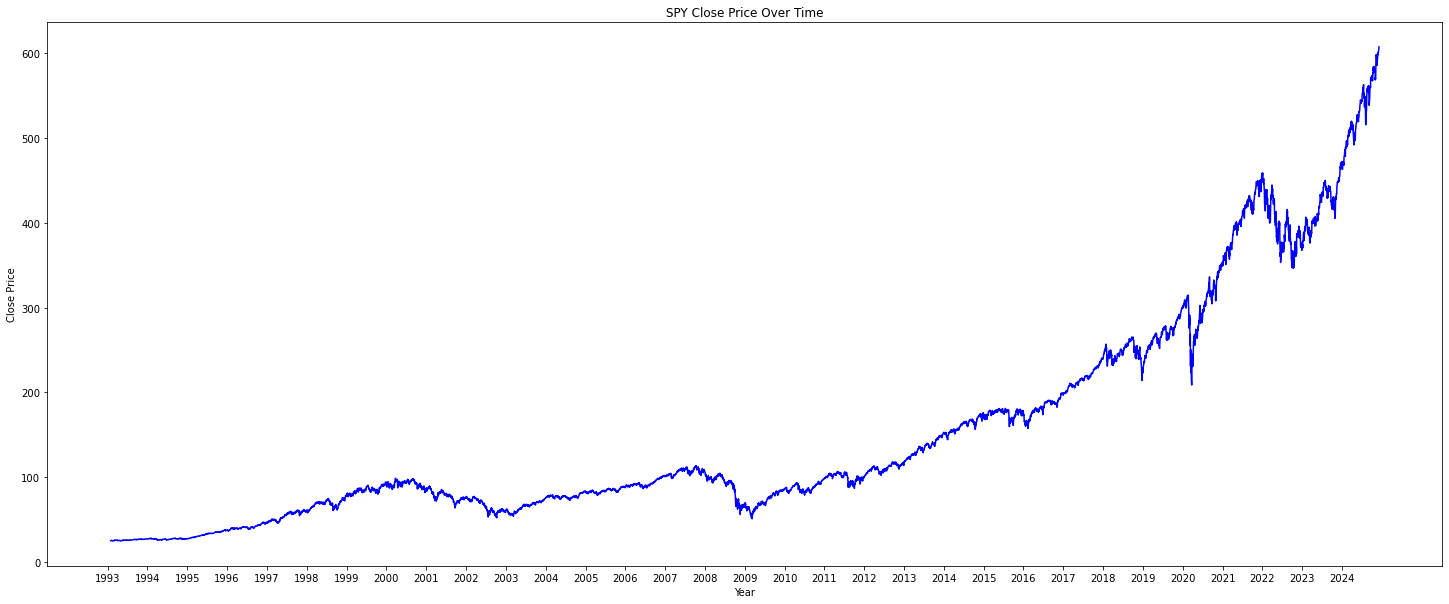

In [2]:
import matplotlib.pyplot as plt

# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])  

plt.figure(figsize=(25, 10))
plt.plot(df['Date'], df['Close'], linestyle='-', color='b')

# Format x-axis to show only unique years
unique_years = df['Date'].dt.year.unique()
plt.xticks([pd.Timestamp(str(year) + '-01-01') for year in unique_years], unique_years)

# Labels and title
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title('SPY Close Price Over Time')

plt.show()


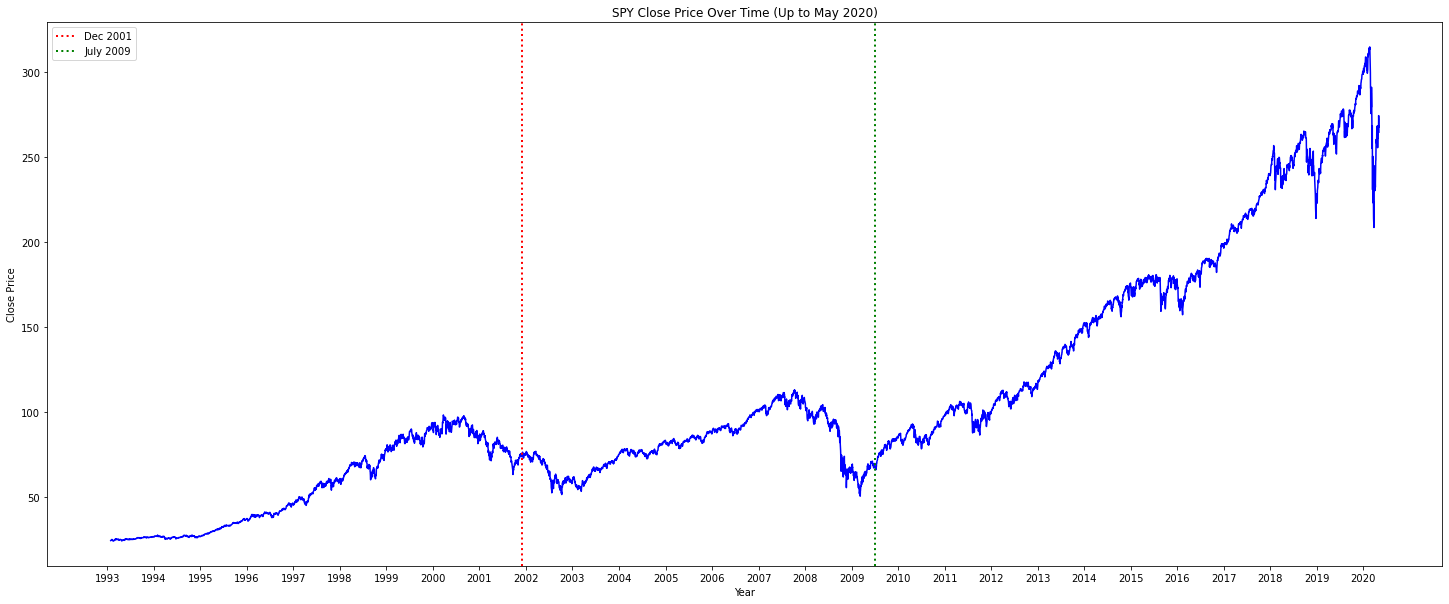

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])  

# Filter data up to May 2020
df = df[df['Date'] <= '2020-05-01']

plt.figure(figsize=(25, 10))
plt.plot(df['Date'], df['Close'], linestyle='-', color='b')

# Format x-axis to show only unique years
unique_years = df['Date'].dt.year.unique()
plt.xticks([pd.Timestamp(str(year) + '-01-01') for year in unique_years], unique_years)

# Add vertical dotted lines
plt.axvline(pd.Timestamp('2001-12-01'), linestyle='dotted', color='r', linewidth=2, label='Dec 2001')
plt.axvline(pd.Timestamp('2009-07-01'), linestyle='dotted', color='g', linewidth=2, label='July 2009')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title('SPY Close Price Over Time (Up to May 2020)')
plt.legend()

plt.show()


In [5]:
df_1 = pd.read_csv('SPY_section_1.csv')
df_2 = pd.read_csv('SPY_section_2.csv')
df_3 = pd.read_csv('SPY_section_3.csv')

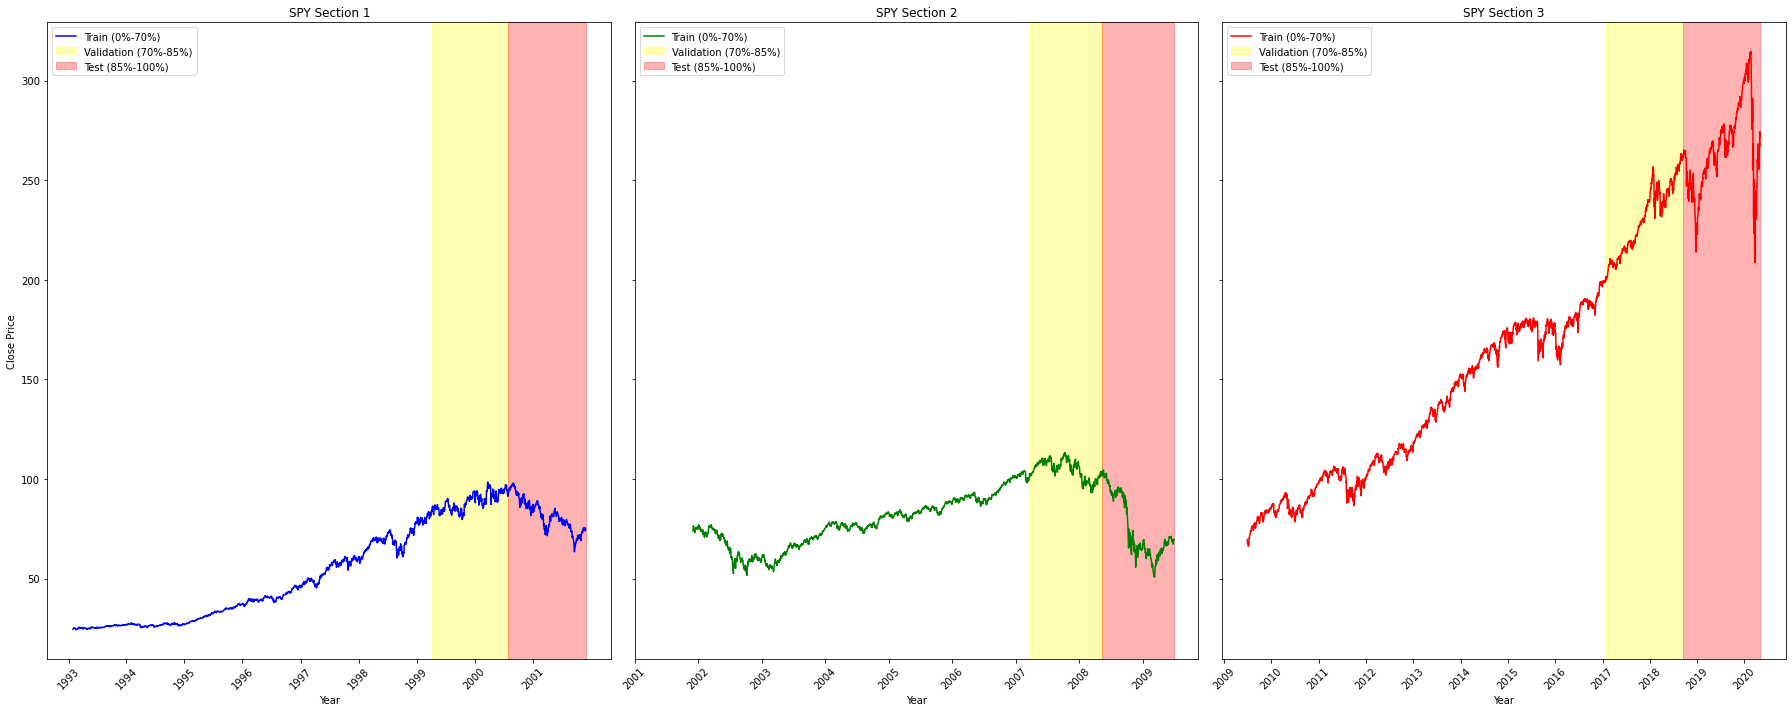

In [13]:
# Ensure 'Date' is in datetime format
df_1['Date'] = pd.to_datetime(df_1['Date'])
df_2['Date'] = pd.to_datetime(df_2['Date'])
df_3['Date'] = pd.to_datetime(df_3['Date'])

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(25, 10), sharey=True)

# Function to highlight validation and test sections and add legend
def highlight_sections(ax, df):
    train_end = int(0.7 * len(df))
    val_end = int(0.85 * len(df))
    
    # Highlight validation set (70% - 85%)
    ax.axvspan(df['Date'].iloc[train_end], df['Date'].iloc[val_end], color='yellow', alpha=0.3, label='Validation (70%-85%)')

    # Highlight test set (85% - 100%)
    ax.axvspan(df['Date'].iloc[val_end], df['Date'].iloc[-1], color='red', alpha=0.3, label='Test (85%-100%)')

    # Add legend to each subplot
    ax.legend()

# Plot the first DataFrame
axes[0].plot(df_1['Date'], df_1['Close'], linestyle='-', color='b', label='Train (0%-70%)')
axes[0].set_title('SPY Section 1')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Close Price')
highlight_sections(axes[0], df_1)

# Format x-axis for the first plot
unique_years_1 = df_1['Date'].dt.year.unique()
axes[0].set_xticks([pd.Timestamp(str(year) + '-01-01') for year in unique_years_1])
axes[0].set_xticklabels(unique_years_1, rotation=45)

# Plot the second DataFrame
axes[1].plot(df_2['Date'], df_2['Close'], linestyle='-', color='g', label='Train (0%-70%)')
axes[1].set_title('SPY Section 2')
axes[1].set_xlabel('Year')
highlight_sections(axes[1], df_2)

# Format x-axis for the second plot
unique_years_2 = df_2['Date'].dt.year.unique()
axes[1].set_xticks([pd.Timestamp(str(year) + '-01-01') for year in unique_years_2])
axes[1].set_xticklabels(unique_years_2, rotation=45)

# Plot the third DataFrame
axes[2].plot(df_3['Date'], df_3['Close'], linestyle='-', color='r', label='Train (0%-70%)')
axes[2].set_title('SPY Section 3')
axes[2].set_xlabel('Year')
highlight_sections(axes[2], df_3)

# Format x-axis for the third plot
unique_years_3 = df_3['Date'].dt.year.unique()
axes[2].set_xticks([pd.Timestamp(str(year) + '-01-01') for year in unique_years_3])
axes[2].set_xticklabels(unique_years_3, rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
